In [9]:
# 필요 모듈 연결
import pandas as pd
import pymysql as mysql
import time
import sys
import mplfinance as mpf

In [10]:
connect = mysql.connect(host = 'localhost', port = 3306, db = 'test',
                       user = 'root', password = 'Smileboy1!', autocommit = True)

cursor = connect.cursor()

In [11]:
# 저장할 데이터 가져오기
df = pd.read_csv('./셀트리온.csv', encoding = "utf-8")
df.shape

(4143, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      4143 non-null   object
 1   종가      4143 non-null   int64 
 2   전일비     4143 non-null   int64 
 3   시가      4143 non-null   int64 
 4   고가      4143 non-null   int64 
 5   저가      4143 non-null   int64 
 6   거래량     4143 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 226.7+ KB


In [31]:
connect = mysql.connect(host = 'localhost', port = 3306, db = 'test',
                       user = 'root', password = 'Smileboy1!', autocommit = True)

cursor = connect.cursor()

# sql 구문 작성
cnt = 0
for i in df.index:
    sqlday = "select day from stock where day = '" + df.loc[i, '날짜'] + "'"
    cursor.execute(sqlday)
    if len(cursor.fetchall()) == 0:
        sql = "insert into stock values('" + df.loc[i, "날짜"] + "',"    
        sql =  sql + "'" + str(df.loc[i, "종가"]) + "',"
        sql =  sql + "'" + str(df.loc[i, "전일비"]) + "',"
        sql =  sql + "'" + str(df.loc[i, "시가"]) + "',"
        sql =  sql + "'" + str(df.loc[i, "고가"]) + "',"
        sql =  sql + "'" + str(df.loc[i, "저가"]) + "',"
        sql =  sql + "'" + str(df.loc[i, "거래량"]) + "')"
        cursor.execute(sql)
    cnt += 1

print(f"데이터 {cnt}개 추가")

connect.commit()
connect.close()

데이터 4143개 추가


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      4143 non-null   object
 1   종가      4143 non-null   int64 
 2   전일비     4143 non-null   int64 
 3   시가      4143 non-null   int64 
 4   고가      4143 non-null   int64 
 5   저가      4143 non-null   int64 
 6   거래량     4143 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 226.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4143 entries, 0 to 4142
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4143 non-null   datetime64[ns]
 1   종가      4143 non-null   int64         
 2   전일비     4143 non-null   int64         
 3   시가      4143 non-null   int64         
 4   고가      4143 non-null   int64         
 5   저가      4143 non-null   int64         
 6   거래량     4143 non-null   int64         
dtypes: dat

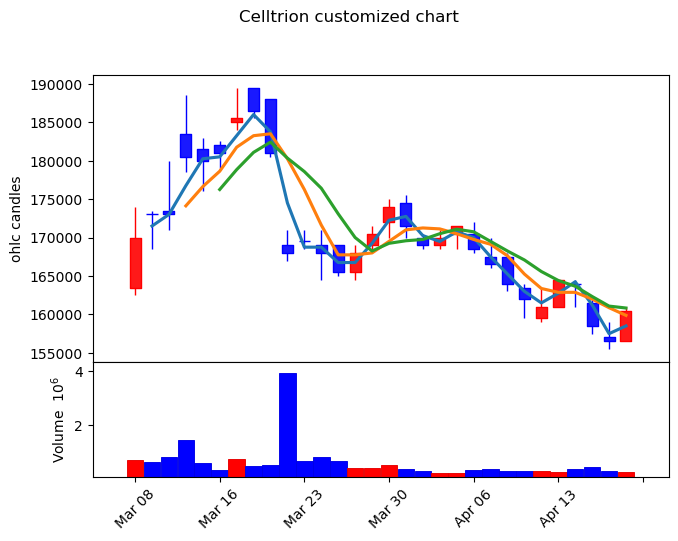

In [33]:
df=pd.DataFrame(df, columns=['날짜','종가',"전일비",'시가','고가','저가','거래량'])
print(df.info())

df=df.dropna()  # None(NaN) 값 제거

df['날짜']=pd.to_datetime(df['날짜'])
df=df.astype({'종가':'int',"전일비":'int','시가':'int','고가':'int','저가':'int','거래량':'int'})

print(df.info())
print(df.tail())

df.to_csv('./셀트리온.csv', index=False)
df=df.iloc[:30]

df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})
df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

#mpf.plot(df, title='Celltrion candle chart', type='candle')
#mpf.plot(df, title='Celltrion ohlc chart', type='ohlc')

kwargs = dict(title='Celltrion customized chart', type='candle',
              mav=(2, 4, 6), volume=True, ylabel='ohlc candles')

mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)